In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [4]:
cd

C:\Users\Ashish


In [5]:
df = pd.read_csv('sms-spam.csv', engine="python", encoding="cp1251")

In [6]:
df['v1']=df['v1'].map({'spam':1,'ham':0})

In [7]:
df.rename({'v1':'is spam' ,'v2':'text'});

In [8]:
df=df.iloc[:,0:2]

In [9]:
df.columns = ['is spam', 'text']


In [10]:
sword=['Free','FREE','Winner','winner','URGENT','WIN','CONGRAT','Congratulation','ringtone','Ringtone']
nsword=[' i ',' I ',"i've","I've","I'll","i'll","i'm","I'm",'oh','where',"Where",'WHERE','WHEN','when','When','sorry','hello',' k ','Haha']


In [11]:
def nswords(text):
    c=0
    for k in nsword:
        if(text.find(k)!=-1):
            c=c+1
    return c                                   
    
df['nswords'] = df['text'].apply(nswords)

In [12]:
def  percentage_digits(text):
    counter = 0
    for i in text:
        if i.isdigit():
            counter += 1
    return (counter / len(text)) * 100

df['percentagedigits'] = df['text'].apply(percentage_digits)
df.head()

,is spam,text,nswords,percentagedigits
0,0,"Go until jurong point, crazy.. Available only ...",0,0.000000
1,0,Ok lar... Joking wif u oni...,0,0.000000
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,0,16.129032
3,0,U dun say so early hor... U c already then say...,0,0.000000
4,0,"Nah I don't think he goes to usf, he lives aro...",1,0.000000


In [13]:
def swords(text):
    c=0
    for k in sword:
        if(text.find(k)!=-1):
            c=c+1
    return c                                   
    
df['swords'] = df['text'].apply(swords)

In [14]:
def percentage_question_mark(text):
    counter = 0
    for i in text:
        if i == '?':
            counter += 1
    return (counter / len(text)) * 100

df['percentagequestionmark'] = df['text'].apply(percentage_question_mark)
df.head()

,is spam,text,nswords,percentagedigits,swords,percentagequestionmark
0,0,"Go until jurong point, crazy.. Available only ...",0,0.000000,0,0.0
1,0,Ok lar... Joking wif u oni...,0,0.000000,0,0.0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,0,16.129032,1,0.0
3,0,U dun say so early hor... U c already then say...,0,0.000000,0,0.0
4,0,"Nah I don't think he goes to usf, he lives aro...",1,0.000000,0,0.0


In [15]:
def percentage_exclamation_mark(text):
    counter = 0
    for i in text:
        if i == '!':
            counter += 1
    return (counter / len(text)) * 100

df['percentageexclamationmark'] = df['text'].apply(percentage_exclamation_mark)
df.head()

,is spam,text,nswords,percentagedigits,swords,percentagequestionmark,percentageexclamationmark
0,0,"Go until jurong point, crazy.. Available only ...",0,0.000000,0,0.0,0.0
1,0,Ok lar... Joking wif u oni...,0,0.000000,0,0.0,0.0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,0,16.129032,1,0.0,0.0
3,0,U dun say so early hor... U c already then say...,0,0.000000,0,0.0,0.0
4,0,"Nah I don't think he goes to usf, he lives aro...",1,0.000000,0,0.0,0.0


In [16]:
def percentage_caps(text):
    counter = 0
    for i in text:
        if i.isupper():
            counter += 1
    return (counter / len(text)) * 100   

df['percentagecaps'] = df['text'].apply(percentage_caps)
df.head()

,is spam,text,nswords,percentagedigits,swords,percentagequestionmark,percentageexclamationmark,percentagecaps
0,0,"Go until jurong point, crazy.. Available only ...",0,0.000000,0,0.0,0.0,2.702703
1,0,Ok lar... Joking wif u oni...,0,0.000000,0,0.0,0.0,6.896552
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,0,16.129032,1,0.0,0.0,6.451613
3,0,U dun say so early hor... U c already then say...,0,0.000000,0,0.0,0.0,4.081633
4,0,"Nah I don't think he goes to usf, he lives aro...",1,0.000000,0,0.0,0.0,3.278689


In [17]:
df['length'] = df['text'].apply(len)
df.head()


,is spam,text,nswords,percentagedigits,swords,percentagequestionmark,percentageexclamationmark,percentagecaps,length
0,0,"Go until jurong point, crazy.. Available only ...",0,0.000000,0,0.0,0.0,2.702703,111
1,0,Ok lar... Joking wif u oni...,0,0.000000,0,0.0,0.0,6.896552,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,0,16.129032,1,0.0,0.0,6.451613,155
3,0,U dun say so early hor... U c already then say...,0,0.000000,0,0.0,0.0,4.081633,49
4,0,"Nah I don't think he goes to usf, he lives aro...",1,0.000000,0,0.0,0.0,3.278689,61


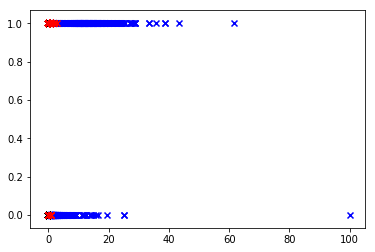

In [18]:
plt.scatter(df['percentagedigits'],df['is spam'], c='b', marker='x', label='1')
plt.scatter(df['swords'],df['is spam'], c='r', marker='x', label='1')
plt.show()

In [19]:
df["A"]=df['nswords']+3*df['percentagequestionmark']
df["B"]=3*df.swords+df.percentagedigits
df["C"]=3*df.swords+df.percentageexclamationmark
df.drop('nswords', axis=1, inplace=True)
df.drop('percentagedigits', axis=1, inplace=True)
df.drop('swords', axis=1, inplace=True)
df.drop('percentageexclamationmark', axis=1, inplace=True)
df.drop('percentagequestionmark', axis=1, inplace=True)

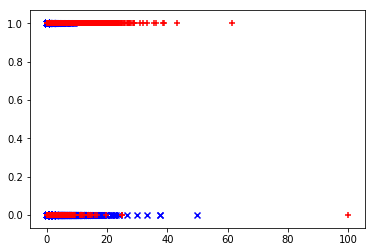

In [20]:
plt.scatter(df["A"],df['is spam'], c='b', marker='x')
plt.scatter(df["B"],df['is spam'], c='r', marker='+')

plt.show()

In [21]:
df.groupby('is spam').mean()

,percentagecaps,length,A,B,C
is spam,,,,,
0,5.954669,71.023627,2.155898,0.423812,0.236919
1,11.365215,138.866131,0.574159,12.804305,1.749616


In [22]:
def isalpha(word):
    wrod = word.replace('.', '')
    return word.isalpha()

def clean_sms(text):
    text = text.lower()
    return (' '.join(filter(lambda x: isalpha(x) and x not in stopwords.words("english"), text.split()))).replace('.', '').split()

In [23]:
cv = CountVectorizer(strip_accents='ascii', min_df=5, analyzer=clean_sms)
df = pd.concat([df, pd.DataFrame(cv.fit_transform(df['text']).todense(), columns=cv.get_feature_names(), index=np.arange(1, cv.fit_transform(df['text']).todense().shape[0] + 1))], axis=1)
df.head(2)

,is spam,text,percentagecaps,length,A,B,C,abiola,able,abt,...,yet,ym,yo,yoga,yr,yrs,yun,yup,zed,мп
0,0.0,"Go until jurong point, crazy.. Available only ...",2.702703,111.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,Ok lar... Joking wif u oni...,6.896552,29.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
df

,is spam,text,percentagecaps,length,A,B,C,abiola,able,abt,...,yet,ym,yo,yoga,yr,yrs,yun,yup,zed,мп
0,0.0,"Go until jurong point, crazy.. Available only ...",2.702703,111.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,Ok lar... Joking wif u oni...,6.896552,29.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,Free entry in 2 a wkly comp to win FA Cup fina...,6.451613,155.0,0.000000,19.129032,3.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,U dun say so early hor... U c already then say...,4.081633,49.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,"Nah I don't think he goes to usf, he lives aro...",3.278689,61.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,FreeMsg Hey there darling it's been 3 week's n...,5.405405,148.0,2.027027,5.702703,4.351351,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,Even my brother is not like to speak with me. ...,2.597403,77.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,As per your request 'Melle Melle (Oru Minnamin...,6.250000,160.0,0.000000,0.625000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,WINNER!! As a valued network customer you have...,8.227848,158.0,0.000000,15.025316,4.898734,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,Had your mobile 11 months or more? U R entitle...,9.090909,154.0,1.948052,14.441558,6.649351,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
a=df.iloc[:,:7]
b=df.iloc[:,7:]
a=a.drop(a.index[5572])
b=b.drop(b.index[0])

In [26]:
b=b.reset_index(drop=True);

In [27]:
df=pd.concat([a, b], axis=1)
df

,is spam,text,percentagecaps,length,A,B,C,abiola,able,abt,...,yet,ym,yo,yoga,yr,yrs,yun,yup,zed,мп
0,0.0,"Go until jurong point, crazy.. Available only ...",2.702703,111.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,Ok lar... Joking wif u oni...,6.896552,29.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,Free entry in 2 a wkly comp to win FA Cup fina...,6.451613,155.0,0.000000,19.129032,3.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,U dun say so early hor... U c already then say...,4.081633,49.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,"Nah I don't think he goes to usf, he lives aro...",3.278689,61.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,FreeMsg Hey there darling it's been 3 week's n...,5.405405,148.0,2.027027,5.702703,4.351351,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,Even my brother is not like to speak with me. ...,2.597403,77.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,As per your request 'Melle Melle (Oru Minnamin...,6.250000,160.0,0.000000,0.625000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,WINNER!! As a valued network customer you have...,8.227848,158.0,0.000000,15.025316,4.898734,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,Had your mobile 11 months or more? U R entitle...,9.090909,154.0,1.948052,14.441558,6.649351,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
X=df.iloc[:,2:]
y=df.iloc[:,:1]

In [29]:
print("X.shape:", X.shape)
print("y.shape:", y.shape)

X.shape: (5572, 1288)
y.shape: (5572, 1)


In [30]:
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.4, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=42)

print("Train dataset size: ", X_train.shape[0])
print("CV size: ", X_cv.shape[0])
print("Test size: ", X_test.shape[0])

Train dataset size:  3343
CV size:  1114
Test size:  1115


In [31]:
clf = LogisticRegression()
clf = clf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
print(classification_report(y_cv, clf.predict(X_cv), target_names=['ham', 'spam']))
print('F1 score:', f1_score(y_cv, clf.predict(X_cv))) 

             precision    recall  f1-score   support

        ham       0.99      1.00      0.99       955
       spam       0.97      0.94      0.96       159

avg / total       0.99      0.99      0.99      1114

F1 score: 0.955128205128


In [33]:
y_actual = y_test
y_predicted = clf.predict(X_test)
y_actual = y_test
y_predicted = clf.predict(X_test)
y_actual=y_actual.reset_index(drop=True);
y_actual=y_actual['is spam']

In [34]:
true_positives=0
true_negatives=0
false_positives=0
false_negatives=0
for i in range(len(y_actual)):
     if((y_actual[i]==1)&(y_predicted[i]==1)): 
                true_positives+=1                 
     elif((y_actual[i]==0)&(y_predicted[i]==0)): 
                true_negatives+=1
                
     elif((y_actual[i]==0)&(y_predicted[i]==1)): 
                false_positives+=1 
                
     elif ((y_actual[i]==1)&(y_predicted[i]==0)): 
                false_negatives+=1

In [35]:
print(true_positives,
true_negatives,
false_positives,
false_negatives)

132 970 5 8


In [36]:
precision = true_positives / (true_positives+ false_positives)
print("Precision:", precision)
recall = true_positives / (true_positives + false_negatives)
print("Recall:", recall)
f1_score = 2 * precision * recall / (precision + recall)
print("F1 score:", f1_score) 

Precision: 0.9635036496350365
Recall: 0.9428571428571428
F1 score: 0.9530685920577618
